In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from IPython.display import display
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_columns = None   # To see the entire columns of dataframes
pd.options.display.max_rows = 100    

In [5]:
train_combat = pd.read_csv("data/train_combat.csv")
train_payment = pd.read_csv("data/train_payment.csv")
train_pledge = pd.read_csv("data/train_pledge.csv")
train_trade = pd.read_csv("data/train_trade.csv")
train_activity = pd.read_csv("data/train_activity.csv")
train_label = pd.read_csv("data/train_label.csv")

In [6]:
# Copy files in case of retrieving the original ones
combat = train_combat.copy()
pledge = train_pledge.copy()
payment = train_payment.copy()
trade = train_trade.copy()
activity = train_activity.copy()

In [7]:
combat['acc_id'].isnull().sum()

0

In [8]:
combat['acc_id'].count()

1574671

In [9]:
combat.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [10]:
# combat[combat["acc_id"].isin(label)].head()

In [11]:
pledge['acc_id'].isnull().sum()

0

In [12]:
payment['acc_id'].isnull().sum()

0

In [13]:
trade['source_acc_id'].isnull().sum()

0

In [14]:
trade['target_acc_id'].isnull().sum()

0

In [15]:
activity['acc_id'].isnull().sum()

0

In [16]:
# Total amount spent per account the whole period
train_label["total_spent"] = train_label["survival_time"] * train_label["amount_spent"]
label = train_label["acc_id"]

In [17]:
combat[combat["acc_id"].isin(label)] # label에 있는 숫자만 골라냄

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,62835,129987,am,2,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,62835,74659,am,4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,62835,179366,am,1,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,62835,157318,am,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,62835,394244,am,5,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
# No need to keep the rows whose "acc_id" does not appear in Label data
combat = combat[combat["acc_id"].isin(label)]
pledge = pledge[pledge["acc_id"].isin(label)]
payment = payment[payment["acc_id"].isin(label)]
trade = trade[trade["source_acc_id"].isin(label)]
trade = trade[trade["target_acc_id"].isin(label)]
activity = activity[activity["acc_id"].isin(label)]
# 요렇게 하면 달라지는 게 무엇인가?

## Common Features

In [19]:
# The number of characters per account
all_char = pd.concat([train_combat[["char_id", "acc_id"]], train_pledge[["char_id", "acc_id"]], train_activity[["char_id", "acc_id"]]])
char_count = all_char.groupby("char_id")["acc_id"].count()
char_count.head()

char_id
2     2
3    24
5    20
7    14
9     2
Name: acc_id, dtype: int64

In [20]:
all_char.sort_values(by='acc_id')['acc_id'].nunique()

40000

In [21]:
all_char.sort_values(by='acc_id')['char_id'].nunique()

150960

In [22]:
char_count = all_char.groupby("acc_id")["char_id"].nunique()

In [23]:
char_count.head()

acc_id
2     1
5     3
8     7
17    4
20    2
Name: char_id, dtype: int64

In [24]:
char_count = pd.DataFrame({"char_count" : char_count})  # in case of merging

In [25]:
all_char.head()
# 전체 char_id에 따른 acc_id 묶어놓은 것!

,char_id,acc_id
0,54861,13809
1,256332,13809
2,307293,13809
3,374964,13809
4,117917,13809


In [26]:
char_count.head()
# 이것의 의미?
# 이거 acc_id가 나와야 하는 것 아님?

,char_count
acc_id,
2,1
5,3
8,7
17,4
20,2


In [27]:
# Find all the unique servers
total_server = pd.concat([train_combat["server"], train_pledge["server"], train_trade["server"], train_activity["server"]])
total_server.head()

0    ap
1    ap
2    ap
3    ap
4    ap
Name: server, dtype: object

In [28]:
server_list = total_server.unique()
server_list

array(['ap', 'am', 'ag', 'ar', 'as', 'ae', 'an', 'az', 'ay', 'bd', 'al',
       'ab', 'av', 'bn', 'ax', 'ai', 'bb', 'aq', 'ad', 'ac', 'bk', 'ak',
       'bl', 'aw', 'aj', 'bm', 'bc', 'at', 'aa', 'bo', 'ao', 'ah', 'au',
       'af', 'bj', 'br', 'bp', 'bg', 'bs', 'bi'], dtype=object)

In [29]:
# Encode servers into integer values
le = LabelEncoder()
le.fit(server_list)
for df in [combat, pledge, trade, activity]:
    df["server"] = le.transform(df["server"])
# server column을 categorial하게 만들어줌!

In [30]:
df.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,0,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,0,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,0,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,0,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,0,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


## Trade

In [31]:
trade.rename(columns={"source_acc_id" : "acc_id"}, inplace=True)

# Remove "source_char_idd" and "target_char_id"
trade.drop(["source_char_id", "target_char_id"], axis=1, inplace=True)

# Substitute NaNs with median at "item_price"
trade["item_price"].fillna(trade["item_price"].median(), inplace=True)

# Categorize transaction time
bins = [0, 60000, 120000, 180000, 239999]
bin_label = [0, 1, 2, 3]   
trade["time_bin"] = pd.cut(pd.to_numeric(trade["time"].str.replace(":", "")), bins=bins, labels=bin_label)
# Those who play during the time other than evening must be differentiated
trade["time_bin"] = trade["time_bin"].map({0:1, 1:1, 2:1, 3:0}) 
trade.drop("time", axis=1, inplace=True)

# Total price per each trade
trade["total_item_price"] = trade["item_amount"] * trade["item_price"]

# Make two trade DataFrames for each source and target
source_trade = trade.drop("target_acc_id", axis=1)
target_trade = trade.drop("acc_id", axis=1)
target_trade.rename(columns={"target_acc_id" : "acc_id"}, inplace=True)

# Total number of trade occurence per account the whole period
source_trade_count = source_trade["acc_id"].value_counts()
target_trade_count = target_trade["acc_id"].value_counts()

source_trade_count = pd.DataFrame({"acc_id" : source_trade_count.index,
                                   "count" : source_trade_count})    # Make a dataframe to merge based on "acc_id"
target_trade_count = pd.DataFrame({"acc_id" : target_trade_count.index,
                                   "count" : target_trade_count})

trade_count = pd.merge(source_trade_count, target_trade_count, on = "acc_id")
trade_count["count"] = trade_count["count_x"] + trade_count["count_y"]
trade_count.drop(["count_x", "count_y"], axis=1, inplace=True)

# Remove columns that do not seem necessary
trade.drop(["server", "target_acc_id", "item_type", "item_amount", "item_price"], axis=1, inplace=True)

trade = pd.concat(
    [pd.pivot_table(data=trade, index=["acc_id", "day"], values=["time_bin", "total_item_price"], aggfunc=sum), # sum all the prices
    pd.pivot_table(data=trade, index=["acc_id", "day"], values=["type"])], # mean for trade type
    axis=1)

## Pledge

In [32]:
# The number of members in each pledge
pledge_num_people = pledge["pledge_id"].value_counts()

# Remove "char_id", "server", "pledge_id" (doesn't seem to matter)
pledge.drop(["char_id", "server", "pledge_id"], axis=1, inplace=True)

# Sum all the values according to days per account
pledge = pd.pivot_table(data=pledge, index=["acc_id", "day"], aggfunc=sum)

# Change name of the columns which are same with the ones in combat file
rename_dict = {"etc_cnt" : "p_etc_cnt", "random_attacker_cnt" : "p_random_attacker_cnt",
              'same_pledge_cnt' : 'p_same_pledge_cnt', "temp_cnt" : "p_temp_cnt", 
               "random_defender_cnt" : "p_random_defender_cnt"}
pledge.rename(columns=rename_dict, inplace=True)

## Activity

In [33]:
# Remove "char_id"
activity.drop("char_id", axis=1, inplace=True)

# Total play time per account the whole period
total_play = activity.groupby("acc_id")["playtime"].sum()
total_play = pd.DataFrame({"total_play_time" : total_play})  # in case of merging

# activity["cum_play_time"] = activity.groupby("acc_id")["playtime"].cumsum()

# Sum all the values per day for each account
activity = pd.concat([pd.pivot_table(data=activity.drop("server", axis=1), index=["acc_id", "day"], aggfunc=sum),
                     pd.pivot_table(data=activity, index=["acc_id", "day"], values=["server"])],
                    axis=1)

# Total exp
activity["total_exp"] = activity["solo_exp"] + activity["party_exp"] + activity["quest_exp"]

# How long do users spend time fishing?
activity["fishing_prop"] = activity["fishing"] / activity["playtime"]

In [34]:
activity.columns

Index(['death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'rich_monster', 'solo_exp',
       'server', 'total_exp', 'fishing_prop'],
      dtype='object')

## Combat

In [35]:
# Remove "char_id", "class", "server"
combat.drop(["char_id", "class", "server"], axis=1, inplace=True)

# Max level? or Mean level?
max_level = combat.groupby("acc_id")["level"].max()
mean_level = combat.groupby("acc_id")["level"].mean()
combat.drop("level", axis=1, inplace=True)

# Sum all the values per day for each account
combat = pd.pivot_table(data=combat, index=["acc_id", "day"], aggfunc=sum)

## Payment

In [36]:
# total_payment = payment.groupby("acc_id")["amount_spent"].sum()
# total_payment.head()

In [37]:
train_label[train_label["acc_id"] == 8]

###### Why are they different????? ####

,acc_id,survival_time,amount_spent,total_spent
5494,8,64,0.02031,1.299843


In [38]:
# Check the results
display(combat.tail())
display(payment.head())
display(pledge.head())
display(trade.head())
display(activity.head())

etc_cnt  num_opponent  pledge_cnt  random_attacker_cnt  \
acc_id day                                                            
130473 24   0.000000      0.000000    0.000000                  0.0   
       25   0.000000      1.079416    1.026948                  0.0   
       26   0.225223      5.985854    7.317004                  0.0   
       27   0.000000      0.000000    0.000000                  0.0   
       28   0.000000      0.000000    0.000000                  0.0   

            random_defender_cnt  same_pledge_cnt  temp_cnt  
acc_id day                                                  
130473 24                   0.0              0.0  0.000000  
       25                   0.0              0.0  0.479728  
       26                   0.0              0.0  0.000000  
       27                   0.0              0.0  0.000000  
       28                   0.0              0.0  0.000000

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


combat_char_cnt  combat_play_time  p_etc_cnt  \
acc_id day                                                 
5      9           0.252625          0.399849   0.120331   
       14          0.180447          0.441895   0.219426   
       20          0.108268          0.593982   0.056626   
       22          0.252625          0.610198   0.092017   
       23          0.036089          0.339385   0.000000   

            non_combat_play_time  play_char_cnt  pledge_combat_cnt  \
acc_id day                                                           
5      9                0.000000       0.649608                0.0   
       14               0.000000       0.396983                0.0   
       20               0.000000       0.505250                0.0   
       22               0.000695       0.721786                0.0   
       23               0.001274       0.541340                0.0   

            p_random_attacker_cnt  p_random_defender_cnt  p_same_pledge_cnt  \
acc_id day                                                                    
5      9                 0.000000               0.143063                0.0   
       14                0.000000               0.000000                0.0   
       20                0.000000               0.071531                0.0   
       22                0.548695               0.357657                0.0   
       23                0.710075               0.000000                0.0   

            p_temp_cnt  
acc_id day              
5      9      0.692181  
       14     0.197766  
       20     0.296649  
       22     0.098883  
       23     0.000000

time_bin  total_item_price  type
acc_id day                                  
2      1         3.0      1.702263e-06   0.0
       2         1.0      5.833293e-03   1.0
       3         1.0      1.138403e-06   0.0
       5         0.0      1.821335e-09   0.0
       7         1.0      1.433993e-06   0.0

death  enchant_count  exp_recovery  fishing  game_money_change  \
acc_id day                                                                   
2      1      0.0            0.0           0.0      0.0           1.024810   
       2      0.0            0.0           0.0      0.0          -1.044201   
       3      0.0            0.0           0.0      0.0           0.451317   
       4      0.0            0.0           0.0      0.0          -0.007230   
       5      0.0            0.0           0.0      0.0           0.015398   

            npc_kill  party_exp  playtime  private_shop  quest_exp  revive  \
acc_id day                                                                   
2      1         0.0        0.0  2.703457      2.462447        0.0     0.0   
       2         0.0        0.0  3.363522      3.149118        0.0     0.0   
       3         0.0        0.0  3.370544      3.183447        0.0     0.0   
       4         0.0        0.0  3.370544      3.131992        0.0     0.0   
       5         0.0        0.0  3.370544      3.135698        0.0     0.0   

            rich_monster  solo_exp  server  total_exp  fishing_prop  
acc_id day                                                           
2      1               0       0.0    20.0        0.0           0.0  
       2               0       0.0    20.0        0.0           0.0  
       3               0       0.0    20.0        0.0           0.0  
       4               0       0.0    20.0        0.0           0.0  
       5               0       0.0    20.0        0.0           0.0

In [227]:
showlist = [combat, pledge, trade, activity]
for i, val in enumerate(showlist):
    print(i, val.index.levels[0].shape)

0 (40000,)
1 (33854,)
2 (24630,)
3 (40000,)


In [229]:
payment.index.shape

(66432,)

In [230]:
payment['acc_id'].nunique()

23726

In [225]:
trade.index.levels[0].shape

(24630,)

In [39]:
# Squeeze the whole dataframes into one
df = combat.join(pledge).join(trade).join(activity)

In [40]:
df.isnull().sum()

etc_cnt                       0
num_opponent                  0
pledge_cnt                    0
random_attacker_cnt           0
random_defender_cnt           0
same_pledge_cnt               0
temp_cnt                      0
combat_char_cnt          196818
combat_play_time         196818
p_etc_cnt                196818
non_combat_play_time     196818
play_char_cnt            196818
pledge_combat_cnt        196818
p_random_attacker_cnt    196818
p_random_defender_cnt    196818
p_same_pledge_cnt        196818
p_temp_cnt               196818
time_bin                 763721
total_item_price         763721
type                     763721
death                         0
enchant_count                 0
exp_recovery                  0
fishing                       0
game_money_change             0
npc_kill                      0
party_exp                     0
playtime                      0
private_shop                  0
quest_exp                     0
revive                        0
rich_mon

In [41]:
df[100:200]

etc_cnt  num_opponent  pledge_cnt  random_attacker_cnt  \
acc_id day                                                            
20     7    0.000000      0.098129    0.256737                  0.0   
       8    0.000000      0.000000    0.000000                  0.0   
       9    6.193634      2.453219    0.128368                  0.0   
       10   0.112612      0.098129    0.000000                  0.0   
       11   0.000000      0.000000    0.000000                  0.0   
       12   0.000000      0.098129    0.128368                  0.0   
       13   3.941403      2.649476    0.513474                  0.0   
       14   0.000000      0.000000    0.000000                  0.0   
       15   0.000000      0.000000    0.000000                  0.0   
       16   1.013504      0.981288    0.064184                  0.0   
       17   0.000000      0.000000    0.000000                  0.0   
       18   0.000000      0.000000    0.000000                  0.0   
       20   0.000000      0.000000    0.000000                  0.0   
       21   0.900892      0.785030    0.000000                  0.0   
       22   0.225223      0.294386    0.064184                  0.0   
       23   0.000000      0.000000    0.000000                  0.0   
       24   0.000000      0.000000    0.000000                  0.0   
       25   0.000000      0.000000    0.000000                  0.0   
       26   0.000000      0.000000    0.000000                  0.0   
       27   3.828792      2.256961    0.128368                  0.0   
       28   0.112612      0.294386    0.000000                  0.0   
21     2    0.000000      0.098129    0.000000                  0.0   
       3    0.000000      0.098129    0.000000                  0.0   
       4    0.112612      0.392515    0.000000                  0.0   
       5    0.000000      0.000000    0.000000                  0.0   
       6    0.000000      0.000000    0.000000                  0.0   
       7    0.112612      0.098129    0.000000                  0.0   
       8    0.000000      0.000000    0.000000                  0.0   
       9    0.000000      0.000000    0.000000                  0.0   
       10   0.000000      0.000000    0.000000                  0.0   
       11   0.000000      0.000000    0.000000                  0.0   
       12   0.000000      0.000000    0.000000                  0.0   
       13   0.000000      0.000000    0.000000                  0.0   
       14   0.000000      0.000000    0.000000                  0.0   
       15   0.000000      0.000000    0.000000                  0.0   
       16   0.000000      0.000000    0.000000                  0.0   
       17   0.000000      0.000000    0.000000                  0.0   
       18   0.000000      0.000000    0.000000                  0.0   
       19   0.000000      0.000000    0.000000                  0.0   
       20   0.000000      0.000000    0.000000                  0.0   
       21   0.000000      0.098129    0.000000                  0.0   
       22   0.000000      0.000000    0.000000                  0.0   
       23   0.000000      0.000000    0.000000                  0.0   
       24   0.000000      0.000000    0.000000                  0.0   
       25   0.000000      0.000000    0.000000                  0.0   
       26   0.000000      0.000000    0.000000                  0.0   
       28   0.000000      0.000000    0.000000                  0.0   
31     1    0.112612      0.098129    0.000000                  0.0   
       2    0.000000      0.000000    0.000000                  0.0   
       3    0.000000      0.098129    0.000000                  0.0   
       4    0.225223      0.196258    0.000000                  0.0   
       5    0.788281      0.588773    0.000000                  0.0   
       6    0.900892      0.392515    0.000000                  0.0   
       7    1.238727      0.981288    0.000000                  0.0   
       8    0.900892      0.686901   

In [42]:
combat.columns

Index(['etc_cnt', 'num_opponent', 'pledge_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt'],
      dtype='object')

In [43]:
# 네트워크 분석을 위해서 주요 분석해야 할 피쳐
# 거래적 축면 : 만약 파밍만 주요로 하는 작업장이라면 어떻게 분류해야 하는가?
# 그것을 오히려 버려야 하는 클러스터인가? 아니면 그냥 놔두면 되는 클러스터인가?
# 혈맹적 측면 : 혈맹끼리 잘 뭉쳐있으면 어떤식으로 점수를 부가해야 하는가
# 혈맹 아이디로 얼마나 모야있는지?
# 이 외에 어떻게 클러스터를 만들어서 분석해야하는가? 생각

# Network analysis using NetworkX
## 다른 캐릭터와의 관계를 분석해보자
## 네트워크 지표를 만들어 생존기간, 평균 결제액과의 상관관계 분석

In [44]:
# 네트워크 분석을 위해서 주요 분석해야 할 피쳐
# 거래적 축면 : 만약 파밍만 주요로 하는 작업장이라면 어떻게 분류해야 하는가?
# 그것을 오히려 버려야 하는 클러스터인가? 아니면 그냥 놔두면 되는 클러스터인가?
# 이 외에 어떻게 클러스터를 만들어서 분석해야하는가? 생각

In [170]:
trade_network = train_trade.copy()

In [171]:
trade_network.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639


In [180]:
trade_network['target_acc_id'].nunique()

72300

In [183]:
target_acc_id = trade_network['target_acc_id'].unique()

In [184]:
trade_network['source_acc_id'].nunique()

60645

In [185]:
source_acc_id = trade_network['source_acc_id'].unique()

In [190]:
df.index.shape

(945628,)

In [198]:
type(df.index)

pandas.core.indexes.multi.MultiIndex

In [205]:
np.shape(df.index.codes[0])

(945628,)

In [267]:
df.index.levels[0].values

array([     2,      5,      8, ..., 130469, 130470, 130473], dtype=int64)

In [212]:
tot_acc_id = df.index.levels[0].values

In [220]:
source_acc_id = pd.DataFrame(source_acc_id)
target_acc_id = pd.DataFrame(target_acc_id)
tot_acc_id = pd.DataFrame(tot_acc_id)

In [221]:
print(source_acc_id.shape)
print(target_acc_id.shape)
print(tot_acc_id.shape)

(60645, 1)
(72300, 1)
(40000, 1)


In [256]:
st = pd.merge(source_acc_id,tot_acc_id,how='inner')
tt = pd.merge(target_acc_id,tot_acc_id,how='inner')
ans = pd.merge(st,tt,how='outer')
ans.shape

(33751, 1)

In [265]:
trade.index.levels[0].values.shape

(24630,)

In [269]:
trade.iloc[ans.values.flatten()].sort_values('acc_id')

time_bin  total_item_price      type
acc_id day                                      
2      3         1.0      1.138403e-06  0.000000
       10        2.0      1.518198e-06  0.000000
       16        1.0      1.311955e-10  0.000000
20     1         1.0      4.487149e-10  1.000000
31     12        0.0      5.160221e-03  1.000000
       21        0.0      6.282008e-03  1.000000
50     17        1.0      6.377275e-09  0.000000
       25        2.0      2.724623e-07  0.000000
       8         1.0      3.229553e-07  0.000000
53     9         0.0      8.980041e-04  1.000000
       26        1.0      2.692289e-04  1.000000
59     18        2.0      9.380560e-09  0.000000
       16        0.0      5.462448e-08  0.000000
       17        3.0      4.071115e-06  0.000000
       13        0.0      9.490114e-10  0.000000
       14        1.0      3.458126e-07  0.000000
       9         2.0      1.093554e-06  0.000000
       20        0.0      4.011923e-07  0.000000
       27        4.0      1.984122e-07  0.000000
63     22        1.0      8.974298e-03  1.000000
65     12        3.0      6.211676e-02  1.000000
       18        4.0      7.317730e-02  1.000000
       19        5.0      1.499494e-02  1.000000
       7         0.0      4.839915e-02  0.800000
       2         4.0      2.812709e-02  1.000000
67     2         0.0      1.929474e-03  1.000000
69     12        0.0      4.487149e-03  1.000000
79     8         1.0      2.295421e-09  0.000000
       15        1.0      1.122051e-02  0.333333
       4         6.0      8.260140e-03  0.363636
       20        1.0      4.350348e-09  0.000000
       13        5.0      2.621001e-02  0.555556
       24        7.0      3.369341e-02  0.375000
       12        6.0      2.032015e-02  0.500000
81     14        0.0      8.525583e-03  1.000000
       13        1.0      2.243574e-04  1.000000
86     6         5.0      7.405163e-07  0.000000
       18        2.0      4.369105e-07  0.000000
       23        4.0      5.899622e-08  0.000000
       9         1.0      1.072085e-06  0.000000
       28        0.0      1.277651e-08  0.000000
       5         1.0      1.602700e-09  0.000000
       3         2.0      7.934557e-09  0.000000
       19        5.0      1.059924e-06  0.000000
91     25        1.0      4.487149e-10  1.000000
97     11        0.0      4.108275e-10  0.000000
       23        0.0      2.274615e-09  0.000000
       28        2.0      3.885332e-08  0.000000
       21        1.0      1.649655e-08  0.000000
       25        1.0      5.095173e-09  0.000000
...              ...               ...       ...
93379  15        4.0      7.135171e-06  0.000000
93384  21       13.0      1.346168e-02  1.000000
       8         0.0      1.794860e-03  1.000000
       22        1.0      2.602546e-07  1.000000
93397  27        0.0      4.487149e-04  1.000000
93408  18        1.0      8.076913e-03  1.000000
       19        1.0      2.692289e-09  1.000000
       7         1.0      4.487149e-10  1.000000
93410  17        0.0      3.589719e-03  1.000000
93428  3         0.0      4.487174e-03  0.666667
       26        5.0      4.487202e-03  0.222222
       19        5.0      4.487301e-03  0.375000
       22        3.0      7.010718e-08  0.142857
       1         5.0      1.346154e-02  0.500000
       13        0.0      1.883270e-09  0.000000
93434  23        1.0      4.488899e-05  1.000000
       13        1.0      1.256402e-05  1.000000
       5         0.0      5.384579e-05  1.000000
       3         0.0      5.384579e-09  1.000000
93435  11        1.0      1.346145e-03  1.000000
       7         2.0      8.974298e-10  1.000000
       25        1.0      1.346145e-03  1.000000
93446  18        0.0      4.487149e-03  1.000000
93448  6         0.0      4.487149e-10  1.000000
93449  8         3.0      4.038434e-09  1.000000
       6         0.0      4.487149e-10  1.000000
       18        3.0      1.166748e-03  1.000000
       15        0.0      4.487149e-03  1.000000
93453  23        0.0      7.628153e-02  1.0

In [236]:
print(st.shape,tt.shape)

(28874, 1) (31373, 1)


In [49]:
# We are interested in 'character' information : drop char id
trade_network = trade_network.drop(columns=['source_char_id','target_char_id'])
trade_network.head()

,day,time,type,server,source_acc_id,target_acc_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,48152,enchant_scroll,4.793968e-08,NaN
1,2,15:33:00,1,al,22220,43228,enchant_scroll,4.314571e-06,NaN
2,1,14:24:53,1,al,18212,38145,accessory,7.190952e-08,NaN
3,7,23:13:43,1,au,121622,71226,adena,9.587936e-03,NaN
4,2,12:43:33,0,bd,14421,65220,etc,1.198492e-07,0.000639


In [50]:
trade_network.shape

(1849325, 9)

In [51]:
trade_network['target_acc_id'].nunique()

72300

In [52]:
trade_network['source_acc_id'].nunique()

60645

In [53]:
trade_acc_id = pd.concat([trade_network['source_acc_id'],trade_network['target_acc_id']])
trade_acc_id.head()

0     11439
1     22220
2     18212
3    121622
4     14421
dtype: int64

In [168]:
trade_acc_id.unique().shape

(80161,)

In [54]:
trade_acc_id.shape

(3698650,)

In [55]:
trade_count_by_acc = trade_acc_id.value_counts()
trade_count_by_acc.head()

50413     8931
33305     6389
111023    5892
120428    5760
3139      5545
dtype: int64

In [56]:
trade_count_by_acc.shape

(80161,)

In [57]:
edges = trade_network[['source_acc_id','target_acc_id']].values
edges.shape

(1849325, 2)

In [58]:
import networkx as nx

G = nx.Graph()

In [59]:
G.add_nodes_from(trade_count_by_acc)

In [60]:
G.add_edges_from(edges)

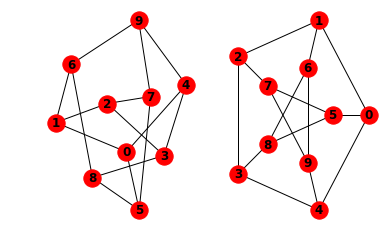

In [64]:
# import matplotlib.pyplot as plt
# G = nx.petersen_graph()
# plt.subplot(121)

# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)

# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [138]:
G_small = nx.Graph()

In [152]:
small_count = trade_count_by_acc[trade_count_by_acc>3000]

In [153]:
small_count.shape

(25,)

In [154]:
small_count_idx = small_count.index.values

In [155]:
pd.DataFrame(edges).shape

(1849325, 2)

In [156]:
pd.DataFrame(edges).drop_duplicates().shape

(774714, 2)

In [157]:
small_edges = pd.DataFrame(edges).drop_duplicates()

In [158]:
df_small_count = pd.DataFrame(small_count)
df_small_count

,0
50413,8931
33305,6389
111023,5892
120428,5760
3139,5545
59264,4766
116315,4418
52260,4385
91062,4369
62350,4275


In [159]:
connection = pd.merge(pd.DataFrame(small_count), small_edges, how='left').dropna()
connection = connection.astype('int')

In [160]:
conn_val = connection.values

In [161]:
G_small.add_nodes_from(small_count)

In [162]:
G_small.add_edges_from(conn_val)

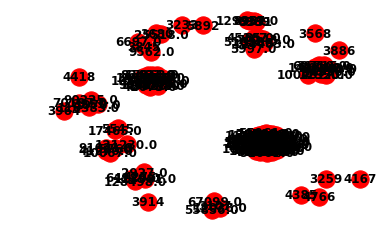

In [163]:
plt.subplot(111)
nx.draw(G_small, with_labels=True, font_weight='bold')
plt.show()

In [164]:
plt.show()